In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


In [3]:
# Load trained model
model = load_model("char_recognition_model.h5")

# Define class labels
label_map = {0: "normal", 1: "reversed", 2: "corrected"}


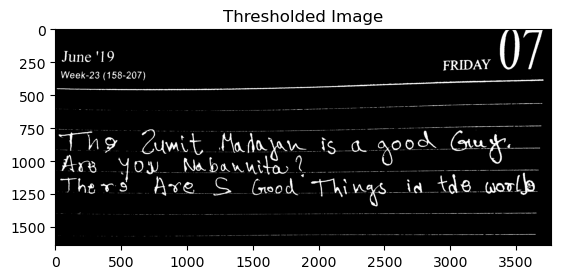

In [17]:
# Load the image
image_path = r"D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg"  # Change this to your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded correctly
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Convert to NumPy array explicitly
img = np.array(img, dtype=np.uint8)

# Apply thresholding to get a binary image
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Convert `thresh` to ensure it is a NumPy array
thresh = np.array(thresh, dtype=np.uint8)

# Display thresholded image
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.show()


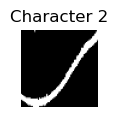

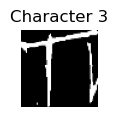

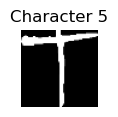

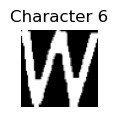

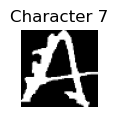

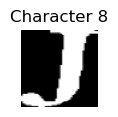

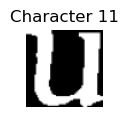

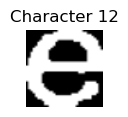

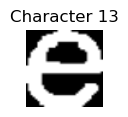

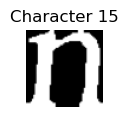

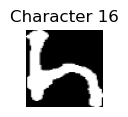

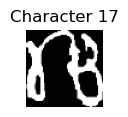

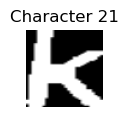

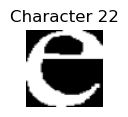

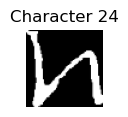

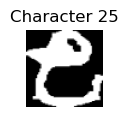

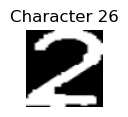

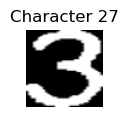

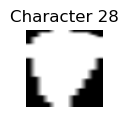

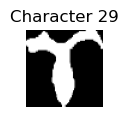

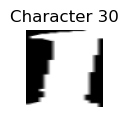

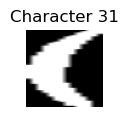

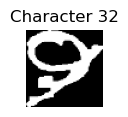

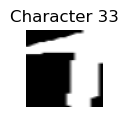

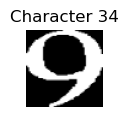

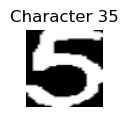

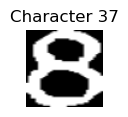

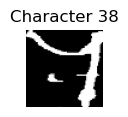

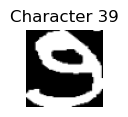

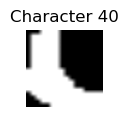

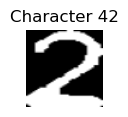

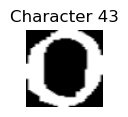

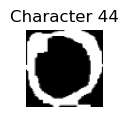

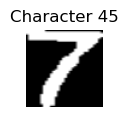

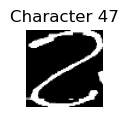

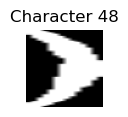

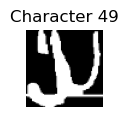

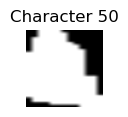

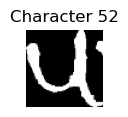

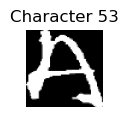

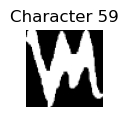

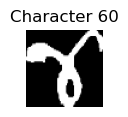

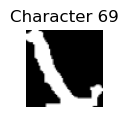

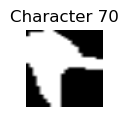

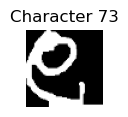

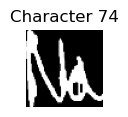

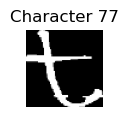

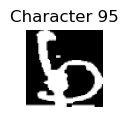

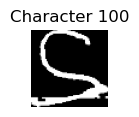

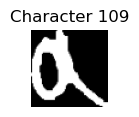

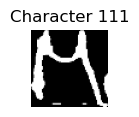

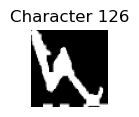

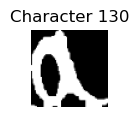

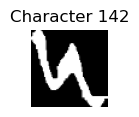

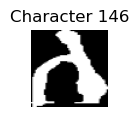

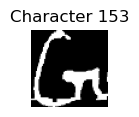

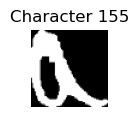

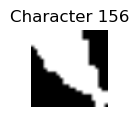

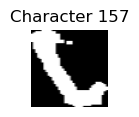

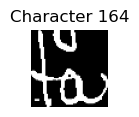

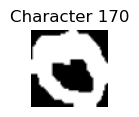

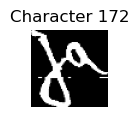

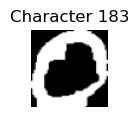

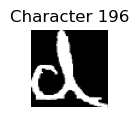

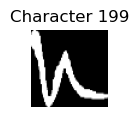

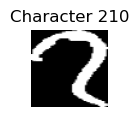

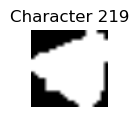

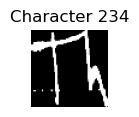

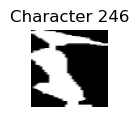

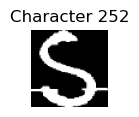

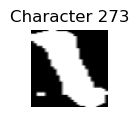

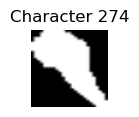

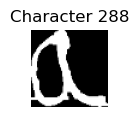

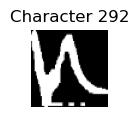

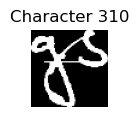

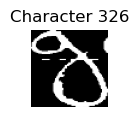

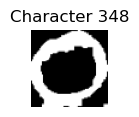

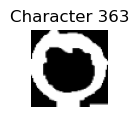

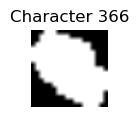

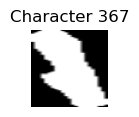

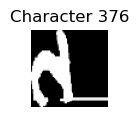

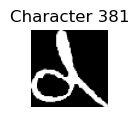

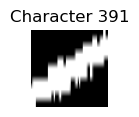

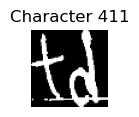

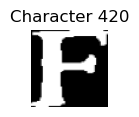

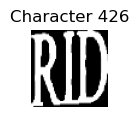

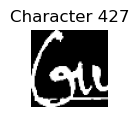

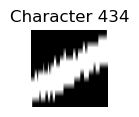

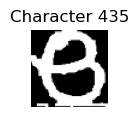

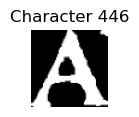

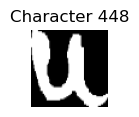

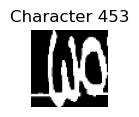

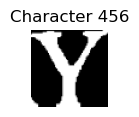

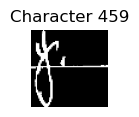

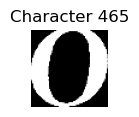

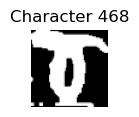

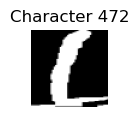

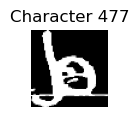

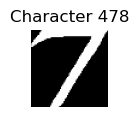

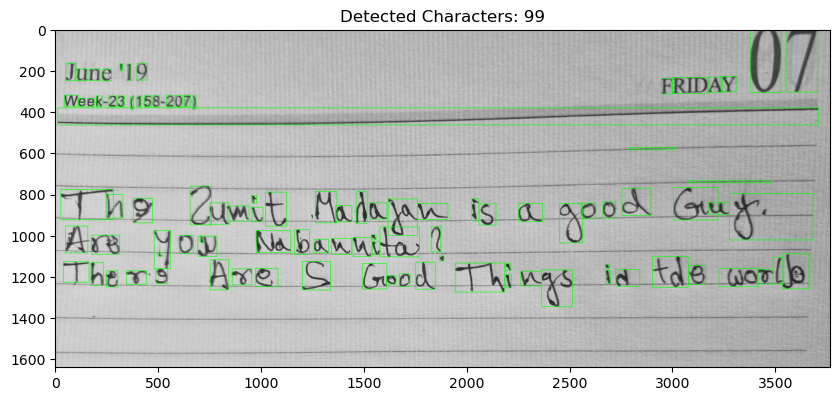

Total characters detected (after filtering): 99


In [18]:
 # Change this to your image path

image_path = r"D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded correctly
if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Apply thresholding
# Apply thresholding
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Apply Morphological Operations to reduce noise and merge parts
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)  # Closes gaps
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)   # Removes noise

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Define minimum size threshold to filter out noise
min_char_area = 300  # Adjust this based on your dataset

character_images = []  # Store extracted characters
filtered_contours = []

# Create a copy of the image for visualization
image_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for i, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    area = w * h

    # Filter out very small contours (noise)
    if area > min_char_area and h > 10:
        char_img = thresh[y:y+h, x:x+w]  # Extract character region
        
        # Resize to match model input size
        char_img = cv2.resize(char_img, (64, 64))
        
        # Normalize pixel values
        char_img = char_img / 255.0
        
        # Expand dimensions to match model input shape
        char_img = np.expand_dims(char_img, axis=-1)  # Add channel dimension
        char_img = np.expand_dims(char_img, axis=0)   # Add batch dimension
        
        character_images.append(char_img)
        filtered_contours.append((x, y, w, h))

        # Draw bounding boxes for visualization
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Show each extracted character
        plt.figure(figsize=(1, 1))
        plt.imshow(char_img.squeeze(), cmap='gray')
        plt.title(f"Character {i+1}")
        plt.axis("off")
        plt.show()

# Display the original image with detected bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Characters: {len(character_images)}")
plt.show()

print(f"Total characters detected (after filtering): {len(character_images)}")

1/1 [==============================] - 0s 56ms/step


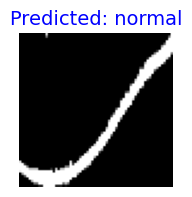

Character 1: normal
1/1 [==============================] - 0s 59ms/step


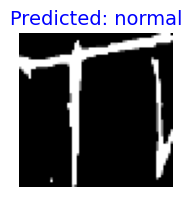

Character 2: normal
1/1 [==============================] - 0s 43ms/step


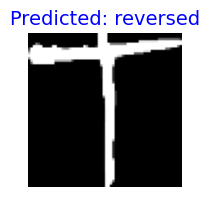

Character 3: reversed
1/1 [==============================] - 0s 44ms/step


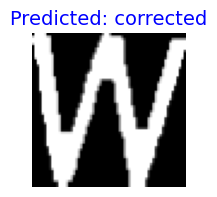

Character 4: corrected
1/1 [==============================] - 0s 42ms/step


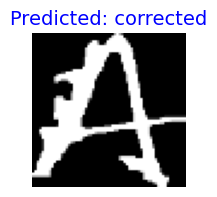

Character 5: corrected
1/1 [==============================] - 0s 72ms/step


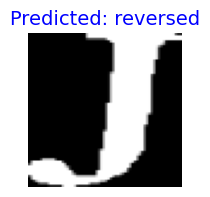

Character 6: reversed
1/1 [==============================] - 0s 64ms/step


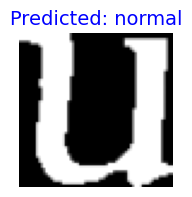

Character 7: normal
1/1 [==============================] - 0s 55ms/step


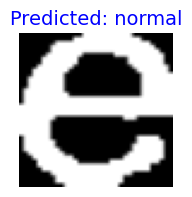

Character 8: normal
1/1 [==============================] - 0s 63ms/step


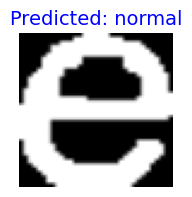

Character 9: normal
1/1 [==============================] - 0s 47ms/step


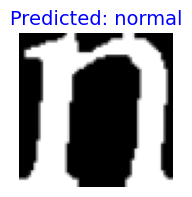

Character 10: normal
1/1 [==============================] - 0s 45ms/step


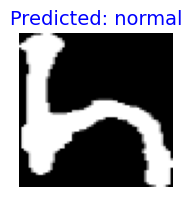

Character 11: normal
1/1 [==============================] - 0s 42ms/step


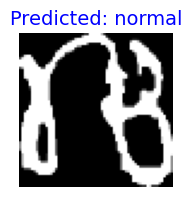

Character 12: normal
1/1 [==============================] - 0s 52ms/step


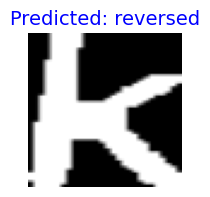

Character 13: reversed
1/1 [==============================] - 0s 51ms/step


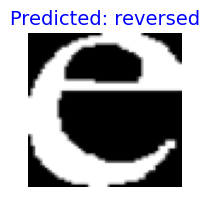

Character 14: reversed
1/1 [==============================] - 0s 54ms/step


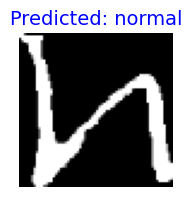

Character 15: normal
1/1 [==============================] - 0s 44ms/step


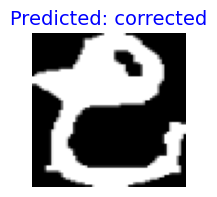

Character 16: corrected
1/1 [==============================] - 0s 42ms/step


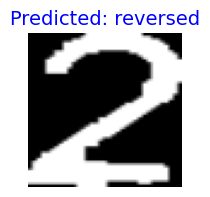

Character 17: reversed
1/1 [==============================] - 0s 43ms/step


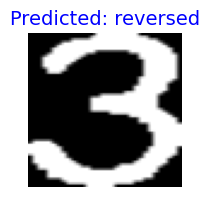

Character 18: reversed
1/1 [==============================] - 0s 50ms/step


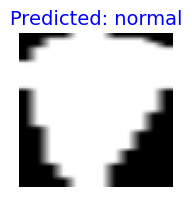

Character 19: normal
1/1 [==============================] - 0s 42ms/step


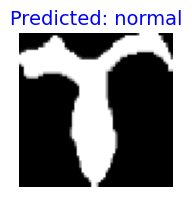

Character 20: normal
1/1 [==============================] - 0s 49ms/step


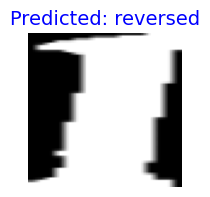

Character 21: reversed
1/1 [==============================] - 0s 37ms/step


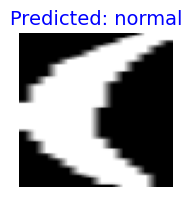

Character 22: normal
1/1 [==============================] - 0s 32ms/step


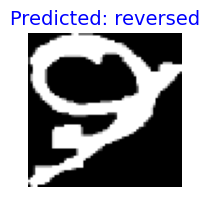

Character 23: reversed
1/1 [==============================] - 0s 52ms/step


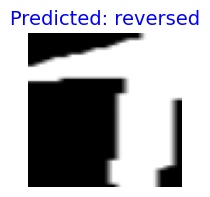

Character 24: reversed
1/1 [==============================] - 0s 56ms/step


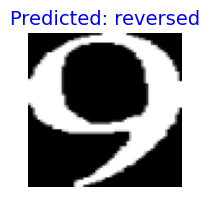

Character 25: reversed
1/1 [==============================] - 0s 46ms/step


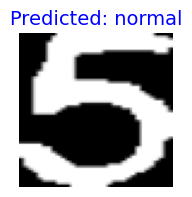

Character 26: normal
1/1 [==============================] - 0s 43ms/step


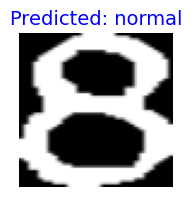

Character 27: normal
1/1 [==============================] - 0s 63ms/step


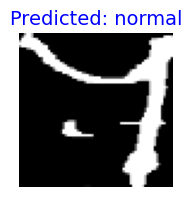

Character 28: normal
1/1 [==============================] - 0s 49ms/step


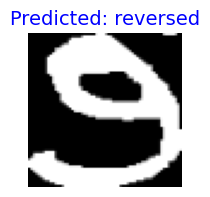

Character 29: reversed
1/1 [==============================] - 0s 44ms/step


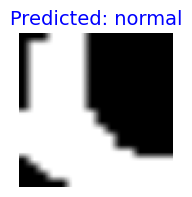

Character 30: normal
1/1 [==============================] - 0s 44ms/step


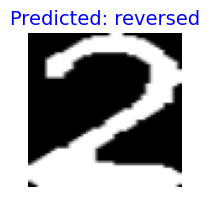

Character 31: reversed
1/1 [==============================] - 0s 44ms/step


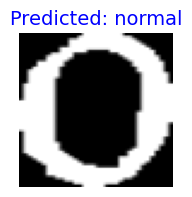

Character 32: normal
1/1 [==============================] - 0s 51ms/step


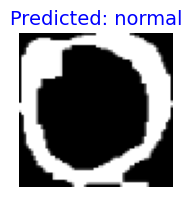

Character 33: normal
1/1 [==============================] - 0s 44ms/step


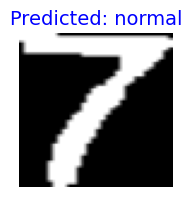

Character 34: normal
1/1 [==============================] - 0s 44ms/step


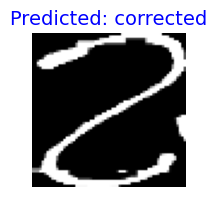

Character 35: corrected
1/1 [==============================] - 0s 46ms/step


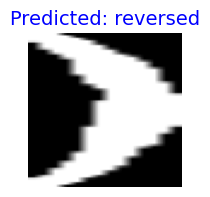

Character 36: reversed
1/1 [==============================] - 0s 44ms/step


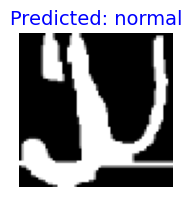

Character 37: normal
1/1 [==============================] - 0s 45ms/step


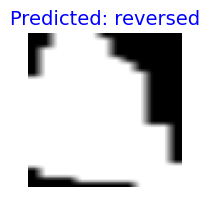

Character 38: reversed
1/1 [==============================] - 0s 43ms/step


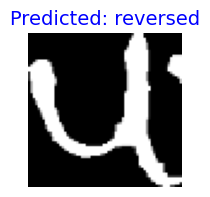

Character 39: reversed
1/1 [==============================] - 0s 44ms/step


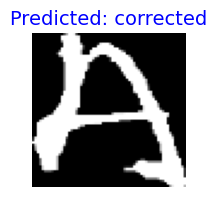

Character 40: corrected
1/1 [==============================] - 0s 45ms/step


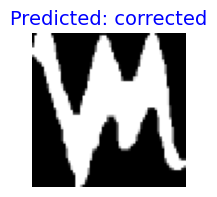

Character 41: corrected
1/1 [==============================] - 0s 45ms/step


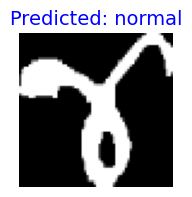

Character 42: normal
1/1 [==============================] - 0s 45ms/step


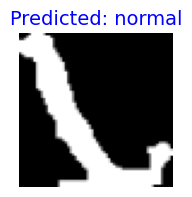

Character 43: normal
1/1 [==============================] - 0s 42ms/step


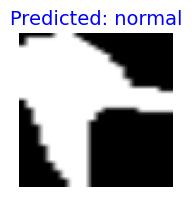

Character 44: normal
1/1 [==============================] - 0s 43ms/step


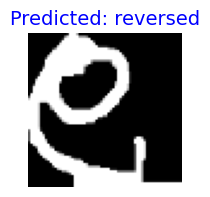

Character 45: reversed
1/1 [==============================] - 0s 41ms/step


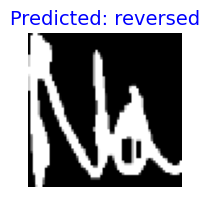

Character 46: reversed
1/1 [==============================] - 0s 41ms/step


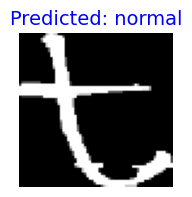

Character 47: normal
1/1 [==============================] - 0s 49ms/step


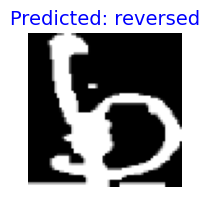

Character 48: reversed
1/1 [==============================] - 0s 43ms/step


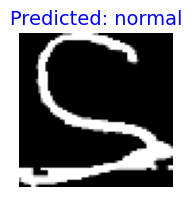

Character 49: normal
1/1 [==============================] - 0s 57ms/step


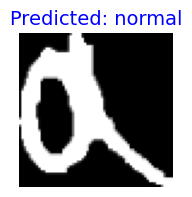

Character 50: normal
1/1 [==============================] - 0s 48ms/step


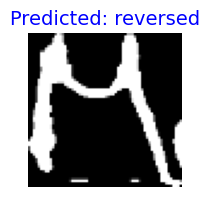

Character 51: reversed
1/1 [==============================] - 0s 45ms/step


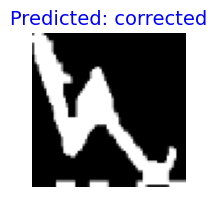

Character 52: corrected
1/1 [==============================] - 0s 44ms/step


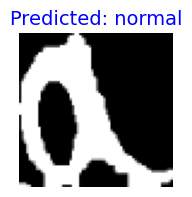

Character 53: normal
1/1 [==============================] - 0s 52ms/step


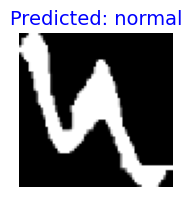

Character 54: normal
1/1 [==============================] - 0s 45ms/step


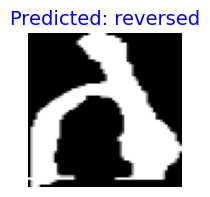

Character 55: reversed
1/1 [==============================] - 0s 42ms/step


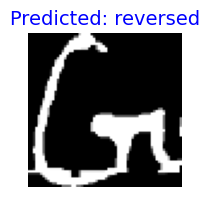

Character 56: reversed
1/1 [==============================] - 0s 55ms/step


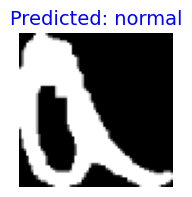

Character 57: normal
1/1 [==============================] - 0s 50ms/step


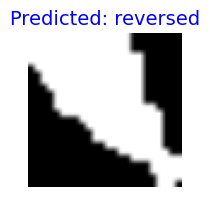

Character 58: reversed
1/1 [==============================] - 0s 46ms/step


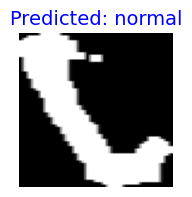

Character 59: normal
1/1 [==============================] - 0s 50ms/step


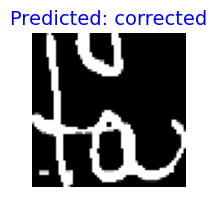

Character 60: corrected
1/1 [==============================] - 0s 42ms/step


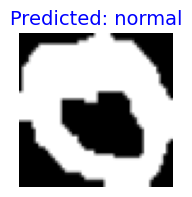

Character 61: normal
1/1 [==============================] - 0s 42ms/step


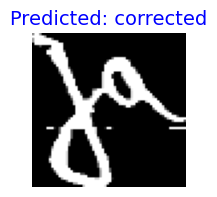

Character 62: corrected
1/1 [==============================] - 0s 61ms/step


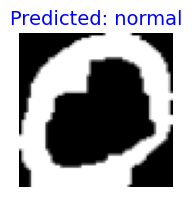

Character 63: normal
1/1 [==============================] - 0s 47ms/step


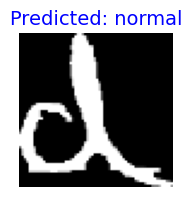

Character 64: normal
1/1 [==============================] - 0s 46ms/step


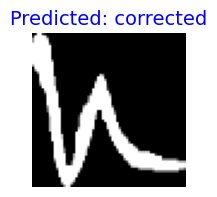

Character 65: corrected
1/1 [==============================] - 0s 43ms/step


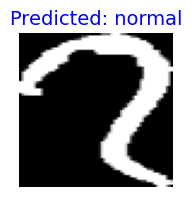

Character 66: normal
1/1 [==============================] - 0s 47ms/step


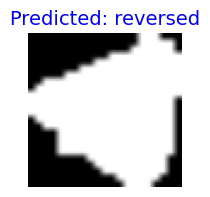

Character 67: reversed
1/1 [==============================] - 0s 65ms/step


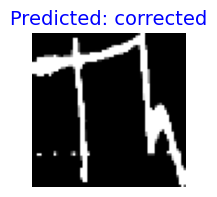

Character 68: corrected
1/1 [==============================] - 0s 43ms/step


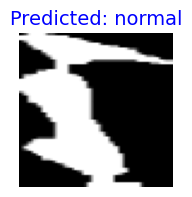

Character 69: normal
1/1 [==============================] - 0s 60ms/step


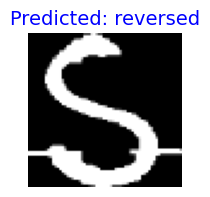

Character 70: reversed
1/1 [==============================] - 0s 37ms/step


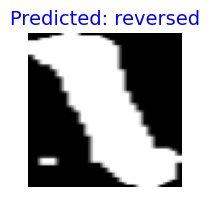

Character 71: reversed
1/1 [==============================] - 0s 62ms/step


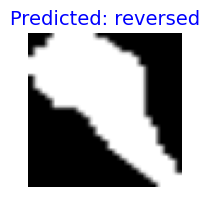

Character 72: reversed
1/1 [==============================] - 0s 56ms/step


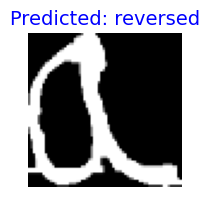

Character 73: reversed
1/1 [==============================] - 0s 54ms/step


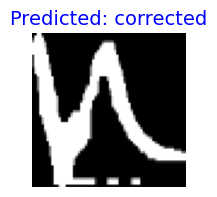

Character 74: corrected
1/1 [==============================] - 0s 43ms/step


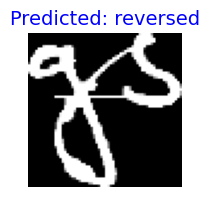

Character 75: reversed
1/1 [==============================] - 0s 43ms/step


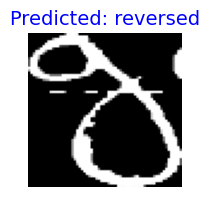

Character 76: reversed
1/1 [==============================] - 0s 46ms/step


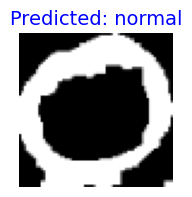

Character 77: normal
1/1 [==============================] - 0s 61ms/step


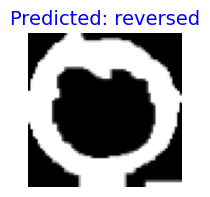

Character 78: reversed
1/1 [==============================] - 0s 42ms/step


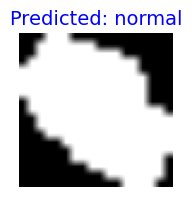

Character 79: normal
1/1 [==============================] - 0s 53ms/step


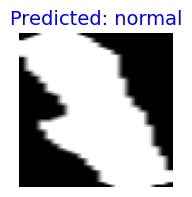

Character 80: normal
1/1 [==============================] - 0s 45ms/step


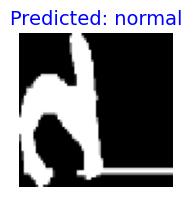

Character 81: normal
1/1 [==============================] - 0s 42ms/step


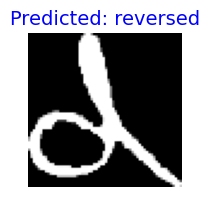

Character 82: reversed
1/1 [==============================] - 0s 45ms/step


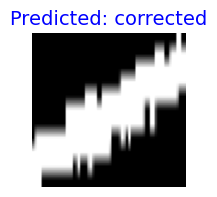

Character 83: corrected
1/1 [==============================] - 0s 48ms/step


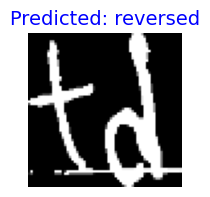

Character 84: reversed
1/1 [==============================] - 0s 46ms/step


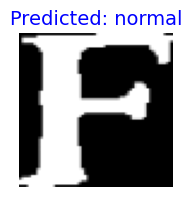

Character 85: normal
1/1 [==============================] - 0s 44ms/step


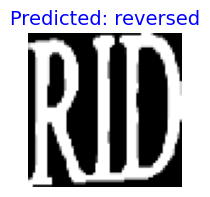

Character 86: reversed
1/1 [==============================] - 0s 63ms/step


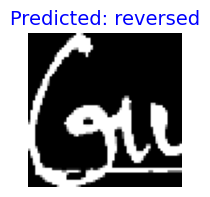

Character 87: reversed
1/1 [==============================] - 0s 56ms/step


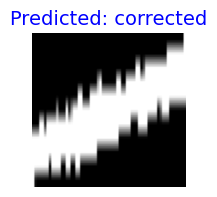

Character 88: corrected
1/1 [==============================] - 0s 44ms/step


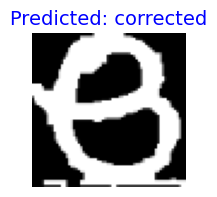

Character 89: corrected
1/1 [==============================] - 0s 46ms/step


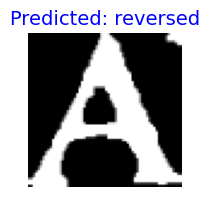

Character 90: reversed
1/1 [==============================] - 0s 58ms/step


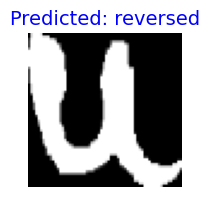

Character 91: reversed
1/1 [==============================] - 0s 43ms/step


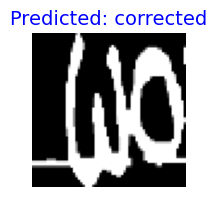

Character 92: corrected
1/1 [==============================] - 0s 45ms/step


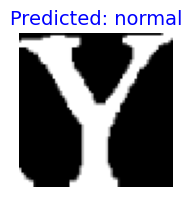

Character 93: normal
1/1 [==============================] - 0s 45ms/step


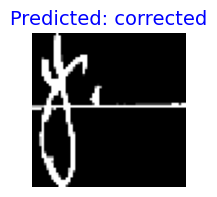

Character 94: corrected
1/1 [==============================] - 0s 54ms/step


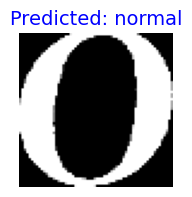

Character 95: normal
1/1 [==============================] - 0s 45ms/step


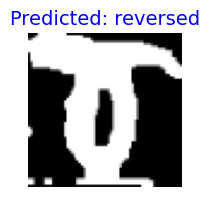

Character 96: reversed
1/1 [==============================] - 0s 45ms/step


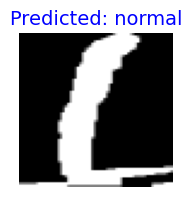

Character 97: normal
1/1 [==============================] - 0s 47ms/step


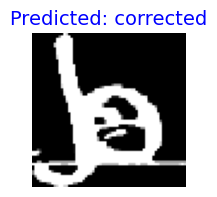

Character 98: corrected
1/1 [==============================] - 0s 45ms/step


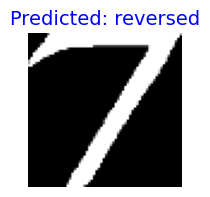

Character 99: reversed


In [19]:
predicted_text = ""

# Iterate over each character image and predict
for i, char_img in enumerate(character_images):
    prediction = model.predict(char_img)  # Predict class probabilities
    predicted_class = np.argmax(prediction)  # Get the class index
    predicted_char = label_map[predicted_class]  # Convert to character

    predicted_text += predicted_char + " "  # Append to final text

    # Display the character image with prediction
    plt.figure(figsize=(2, 2))
    plt.imshow(char_img.squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_char}", fontsize=14, color="blue")
    plt.axis("off")
    plt.show()

    print(f"Character {i+1}: {predicted_char}")

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model  # if model is saved and loaded
from tensorflow.keras.preprocessing.image import img_to_array

# ----------------------
# Load Trained Model
# ----------------------
# If you saved your model, uncomment below
model = load_model("reversal_detector.h5")

label_map = {0: "normal", 1: "reversal", 2: "corrected"}

# ----------------------
# Preprocessing Function
# ----------------------
def preprocess_character(char_img, output_size=64):
    # Resize while preserving aspect ratio
    h, w = char_img.shape
    scale = output_size / max(h, w)
    resized = cv2.resize(char_img, (int(w * scale), int(h * scale)))

    # Pad to make square
    pad_h = output_size - resized.shape[0]
    pad_w = output_size - resized.shape[1]
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

    # Normalize
    padded = padded / 255.0
    padded = np.expand_dims(padded, axis=-1)  # shape: (64, 64, 1)
    padded = np.expand_dims(padded, axis=0)   # shape: (1, 64, 64, 1)
    return padded

# ----------------------
# Load and Threshold Image
# ----------------------
image_path = r"D:\STUDY\Sumit\lectures sumit\college\Major Project\test.jpeg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Error: Image not found. Check the file path.")

# Apply threshold
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# ----------------------
# Extract Contours
# ----------------------
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

min_char_area = 300
character_images = []
image_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for i, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    area = w * h

    if area > min_char_area and h > 10:
        char_img = thresh[y:y+h, x:x+w]

        # Optional dilation
        char_img = cv2.dilate(char_img, np.ones((2, 2), np.uint8), iterations=1)

        # Preprocess for prediction
        char_img_processed = preprocess_character(char_img)
        character_images.append(char_img_processed)

        # Draw bounding box
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# ----------------------
# Show Extracted Bounding Boxes
# ----------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Characters: {len(character_images)}")
plt.axis("off")
plt.show()

# ----------------------
# Predict Characters
# ----------------------
predicted_text = ""

for i, char_img in enumerate(character_images):
    prediction = model.predict(char_img)
    predicted_class = np.argmax(prediction)
    predicted_char = label_map[predicted_class]

    predicted_text += predicted_char + " "

    # Visualize
    plt.figure(figsize=(2, 2))
    plt.imshow(char_img.squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_char}", fontsize=14, color="blue")
    plt.axis("off")
    plt.show()

    print(f"Character {i+1}: {predicted_char}")

print("\n🔤 Final Predicted Text Sequence:")
print(predicted_text)


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4055: error: (-215:Assertion failed) inv_scale_x > 0 in function 'cv::resize'


In [2]:
import cv2
import numpy as np

def preprocess_char(img, output_size=(28,28), pad=4):
    # 1) Binarize
    _, thresh = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 2) Find contours and grab the largest one
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    if len(cnts)==0:
        return cv2.resize(thresh, output_size) / 255.0
    c = max(cnts, key=cv2.contourArea)

    # 3) Crop to bounding box
    x,y,w,h = cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]

    # 4) Pad to square
    m = max(w,h) + pad*2
    square = np.zeros((m,m), dtype=np.uint8)
    # center the ROI in the square
    x_off = (m - w)//2
    y_off = (m - h)//2
    square[y_off:y_off+h, x_off:x_off+w] = roi

    # 5) Optional: re-center using centroid
    # Compute centroid of the white pixels
    M = cv2.moments(square)
    if M["m00"] > 0:
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])
        # shift so centroid is at center of image
        shift_x = m//2 - cx
        shift_y = m//2 - cy
        T = np.float32([[1,0,shift_x],[0,1,shift_y]])
        square = cv2.warpAffine(square, T, (m,m), borderValue=0)

    # 6) Resize to network input
    final = cv2.resize(square, output_size, interpolation=cv2.INTER_AREA)

    # 7) Normalize to [0,1]
    final = final.astype(np.float32) / 255.0

    # If your network expects a channel dimension:
    return final.reshape(output_size[0], output_size[1], 1)

image_path = r"D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg"
# Example usage:
raw = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
pre = preprocess_char(raw, output_size=(32,32))
# now feed `pre` into your model


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ─────────────── CONFIG ───────────────
MODEL_PATH = "reversal_detector.h5"    # ← your .h5 or SavedModel folder
LABEL_MAP  = {0: "A", 1: "B", 2: "C"}  # ← adjust to your classes
INPUT_SIZE = (32, 32)              # ← model’s expected H×W

# ────────── PREPROCESSING FUNC ──────────
def preprocess_char(img, output_size=INPUT_SIZE, pad=4):
    # 1) Binarize (white-on-black)
    _, thresh = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 2) Find largest contour
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        # fallback to resized blank
        blank = np.zeros(output_size, dtype=np.uint8)
        return blank.astype(np.float32) / 255.0

    c = max(cnts, key=cv2.contourArea)

    # 3) Crop to bbox
    x,y,w,h = cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]

    # 4) Pad to square
    M = max(w,h) + pad*2
    square = np.zeros((M, M), dtype=np.uint8)
    xo, yo = (M - w)//2, (M - h)//2
    square[yo:yo+h, xo:xo+w] = roi

    # 5) Center by centroid
    moments = cv2.moments(square)
    if moments["m00"] > 0:
        cx = int(moments["m10"]/moments["m00"])
        cy = int(moments["m01"]/moments["m00"])
        tx, ty = M//2 - cx, M//2 - cy
        T = np.float32([[1,0,tx],[0,1,ty]])
        square = cv2.warpAffine(square, T, (M,M), borderValue=0)

    # 6) Resize & 7) Normalize
    out = cv2.resize(square, output_size, interpolation=cv2.INTER_AREA)
    out = out.astype(np.float32) / 255.0
    return out[..., np.newaxis]  # add channel dim

# ─────────── CHAR SEGMENTATION ───────────
def segment_char_images(gray):
    # global binarization
    _, thresh = cv2.threshold(gray, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    # sort left→right
    boxes = [cv2.boundingRect(c) for c in cnts]
    boxes = sorted(boxes, key=lambda b: b[0])
    chars = [ gray[y:y+h, x:x+w] for (x,y,w,h) in boxes ]
    return chars

# ─────────────── MAIN PREDICT ───────────────
def predict_image(img_path):
    # load model
    model = load_model(MODEL_PATH)

    # read & convert
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    chars = segment_char_images(gray)

    predicted_text = ""
    for i, raw_char in enumerate(chars):
        # preprocess
        inp = preprocess_char(raw_char)

        # model wants batch
        logits = model.predict(inp[np.newaxis, ...])  
        cls   = np.argmax(logits, axis=1)[0]
        ch    = LABEL_MAP[cls]
        predicted_text += ch

        # display
        plt.figure(figsize=(2,2))
        plt.imshow(inp.squeeze(), cmap="gray")
        plt.title(f"#{i+1} → {ch}", color="blue")
        plt.axis("off")
        plt.show()

    print("Final prediction:", predicted_text)
    return predicted_text

# ─────────────── USAGE EXAMPLE ───────────────
if __name__ == "__main__":
    img_file =  "D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg"    
    predict_image(img_file)


Final prediction: 


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# ─────────────── CONFIG ───────────────
MODEL_PATH = "char_recognition_model.h5"    # ← your .h5 or SavedModel folder
LABEL_MAP  = {0: "A", 1: "B", 2: "C"}        # ← adjust to your classes
INPUT_SIZE = (32, 32)                       # ← model’s expected H×W

def preprocess_char(img, output_size=INPUT_SIZE, pad=4):
    # ... [same as before] ...
    # (copy your preprocess_char implementation here)
    return out[..., np.newaxis]

def segment_char_images(gray):
    # ... [same as before] ...
    return chars

def predict_image(img_path):
    # 1) Check model file
    if not os.path.isfile(MODEL_PATH):
        raise FileNotFoundError(f"Model not found at {MODEL_PATH}")
    model = load_model(MODEL_PATH)
    print(f"Loaded model from {MODEL_PATH}")

    # 2) Load image
    print(f"Reading image from: {img_path}")
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise FileNotFoundError(f"Could not read image at {img_path}")
    print(f"Image shape: {gray.shape}")

    # 3) Segment
    chars = segment_char_images(gray)
    print(f"Found {len(chars)} character(s)")

    if len(chars) == 0:
        print("No characters detected – check your thresholding or try a different test image.")
        return ""

    predicted_text = ""
    for i, raw_char in enumerate(chars):
        inp = preprocess_char(raw_char)

        # model wants batch axis:
        logits = model.predict(inp[np.newaxis, ...])
        cls   = np.argmax(logits, axis=1)[0]
        ch    = LABEL_MAP.get(cls, "?")
        predicted_text += ch

        # display
        plt.figure(figsize=(2,2))
        plt.imshow(inp.squeeze(), cmap="gray")
        plt.title(f"#{i+1} → {ch}", color="blue")
        plt.axis("off")
        plt.show()

    print("Final prediction:", predicted_text)
    return predicted_text

if __name__ == "__main__":
    # — make sure to either use forward slashes or raw‐string for Windows paths! —
    img_file = r"D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg"
    predict_image(img_file)


Loaded model from char_recognition_model.h5
Reading image from: D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg
Image shape: (1640, 3768)


NameError: name 'chars' is not defined

Loaded model from char_recognition_model.h5
Reading image from: D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg
Image shape: (1640, 3768)
Found 1680 character(s)
1/1 [==============================] - 0s 125ms/step


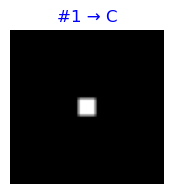

1/1 [==============================] - 0s 19ms/step


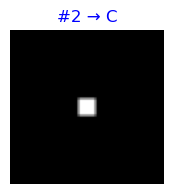

1/1 [==============================] - 0s 19ms/step


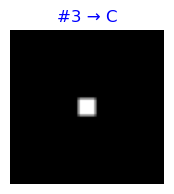

1/1 [==============================] - 0s 18ms/step


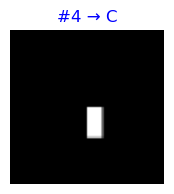

1/1 [==============================] - 0s 19ms/step


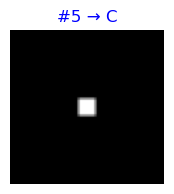

1/1 [==============================] - 0s 20ms/step


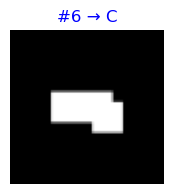

1/1 [==============================] - 0s 19ms/step


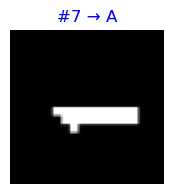

1/1 [==============================] - 0s 19ms/step


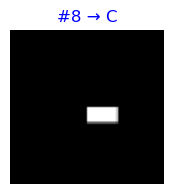

1/1 [==============================] - 0s 24ms/step


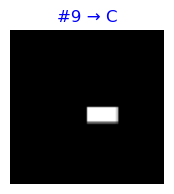

1/1 [==============================] - 0s 20ms/step


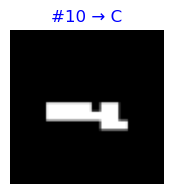

1/1 [==============================] - 0s 27ms/step


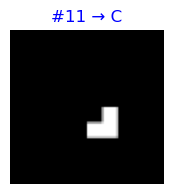

1/1 [==============================] - 0s 23ms/step


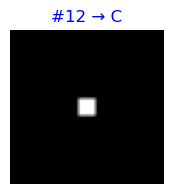

1/1 [==============================] - 0s 21ms/step


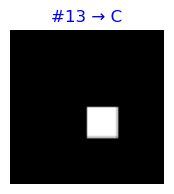

1/1 [==============================] - 0s 20ms/step


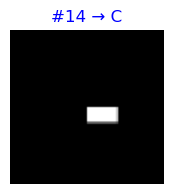

1/1 [==============================] - 0s 19ms/step


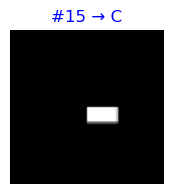

1/1 [==============================] - 0s 19ms/step


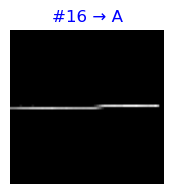

1/1 [==============================] - 0s 20ms/step


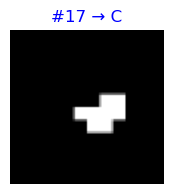

1/1 [==============================] - 0s 19ms/step


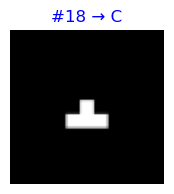

1/1 [==============================] - 0s 19ms/step


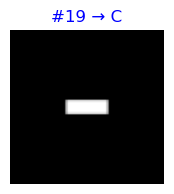

1/1 [==============================] - 0s 19ms/step


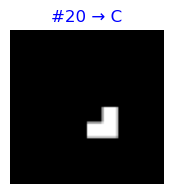

1/1 [==============================] - 0s 19ms/step


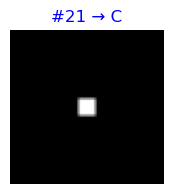

1/1 [==============================] - 0s 19ms/step


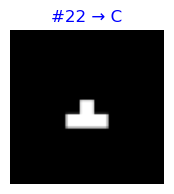

1/1 [==============================] - 0s 18ms/step


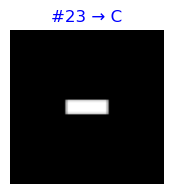

1/1 [==============================] - 0s 19ms/step


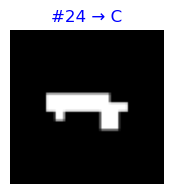

1/1 [==============================] - 0s 20ms/step


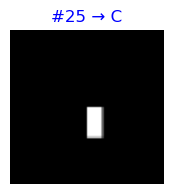

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\JAI SHREE KRISHNA\AppData\Local\Temp\ipykernel_14940\2709880583.py", line 111, in <module>
      predict_image(img_file)
    File "C:\Users\JAI SHREE KRISHNA\AppData\Local\Temp\ipykernel_14940\2709880583.py", line 93, in predict_image
      logits = model.predict(inp[np.newaxis, ...])
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\JAI SHREE KRISHNA\anaconda3\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [1,64,64]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_3413]

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# ─────────────── CONFIG ───────────────
MODEL_PATH = "char_recognition_model.h5"    # ← your .h5 or SavedModel folder
LABEL_MAP  = {0: "A", 1: "B", 2: "C"}        # ← adjust to your classes
INPUT_SIZE = (64, 64)                       # ← model’s expected H×W

# ────────── PREPROCESSING FUNC ──────────
def preprocess_char(img, output_size=INPUT_SIZE, pad=4):
    # 1) Binarize (white-on-black)
    _, thresh = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 2) Find largest contour
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        blank = np.zeros(output_size, dtype=np.uint8)
        return blank.astype(np.float32) / 255.0

    c = max(cnts, key=cv2.contourArea)

    # 3) Crop to bbox
    x,y,w,h = cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]

    # 4) Pad to square
    M = max(w,h) + pad*2
    square = np.zeros((M, M), dtype=np.uint8)
    xo, yo = (M - w)//2, (M - h)//2
    square[yo:yo+h, xo:xo+w] = roi

    # 5) Center by centroid
    moments = cv2.moments(square)
    if moments["m00"] > 0:
        cx = int(moments["m10"]/moments["m00"])
        cy = int(moments["m01"]/moments["m00"])
        tx, ty = M//2 - cx, M//2 - cy
        T = np.float32([[1,0,tx],[0,1,ty]])
        square = cv2.warpAffine(square, T, (M,M), borderValue=0)

    # 6) Resize & 7) Normalize
    out = cv2.resize(square, output_size, interpolation=cv2.INTER_AREA)
    out = out.astype(np.float32) / 255.0
    return out[..., np.newaxis]

# ─────────── CHAR SEGMENTATION ───────────
def segment_char_images(gray):
    # 1) Binarize the full line/word
    _, thresh = cv2.threshold(gray, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # 2) Find all contours
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
    # 3) Build bounding boxes and sort left→right
    boxes = [cv2.boundingRect(c) for c in cnts]
    boxes = sorted(boxes, key=lambda b: b[0])
    # 4) Crop each char from the original gray
    chars = [gray[y:y+h, x:x+w] for (x,y,w,h) in boxes]
    return chars

# ─────────────── MAIN PREDICT ───────────────
def predict_image(img_path):
    # 1) Check model
    if not os.path.isfile(MODEL_PATH):
        raise FileNotFoundError(f"Model not found at {MODEL_PATH}")
    model = load_model(MODEL_PATH)
    print(f"Loaded model from {MODEL_PATH}")

    # 2) Load image
    print(f"Reading image from: {img_path}")
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise FileNotFoundError(f"Could not read image at {img_path}")
    print(f"Image shape: {gray.shape}")

    # 3) Segment characters
    chars = segment_char_images(gray)
    print(f"Found {len(chars)} character(s)")

    if not chars:
        print("No characters detected – check your thresholding.")
        return ""

    # 4) Predict each character
    predicted_text = ""
    for i, raw_char in enumerate(chars):
        inp = preprocess_char(raw_char)
        logits = model.predict(inp[np.newaxis, ...])
        cls = np.argmax(logits, axis=1)[0]
        ch = LABEL_MAP.get(cls, "?")
        predicted_text += ch

        # show the preprocessed patch
        plt.figure(figsize=(2,2))
        plt.imshow(inp.squeeze(), cmap="gray")
        plt.title(f"#{i+1} → {ch}", color="blue")
        plt.axis("off")
        plt.show()

    print("Final prediction:", predicted_text)
    return predicted_text

# ─────────────── USAGE EXAMPLE ───────────────
if __name__ == "__main__":
    img_file = r"D:\STUDY\Sumit\lectures sumit\college\sem 6\test.jpeg"
    predict_image(img_file)


Loaded model from reversal_detector.h5
Image shape: (2160, 3840)
Detected 40 character candidates
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


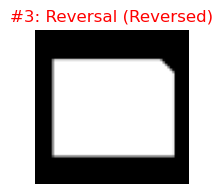

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


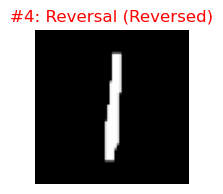

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


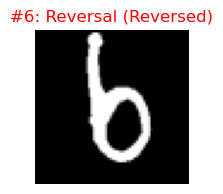

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


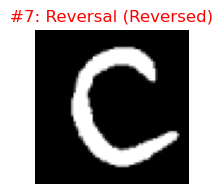

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


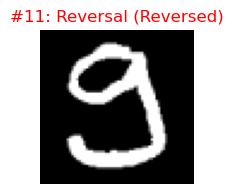

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


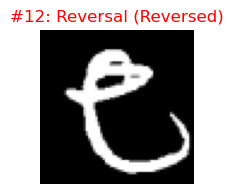

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


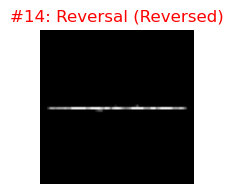

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


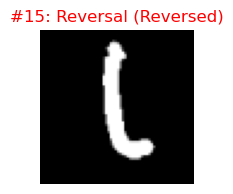

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


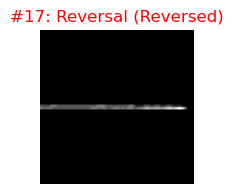

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


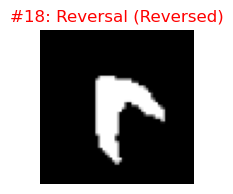

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


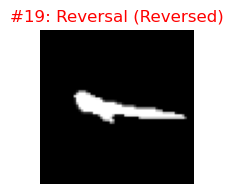

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


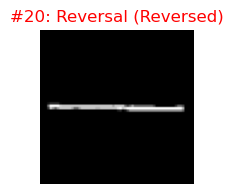

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


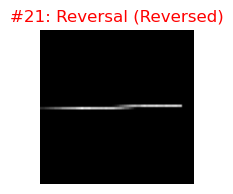

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


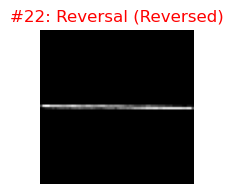

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


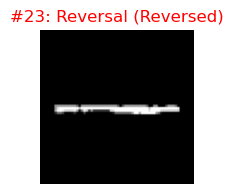

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


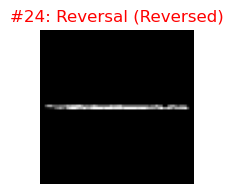

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


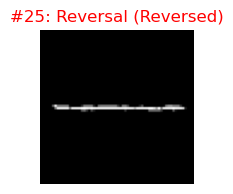

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


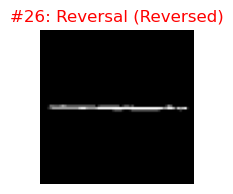

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


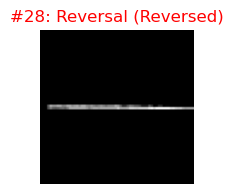

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


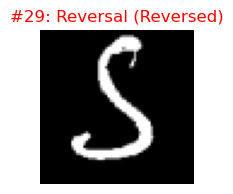

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


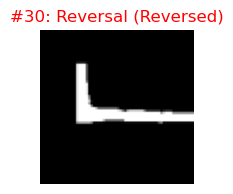

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


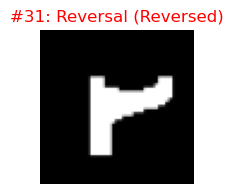

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


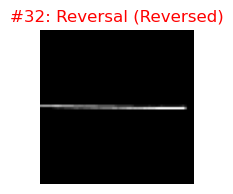

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


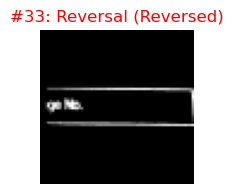

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


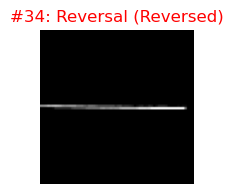

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


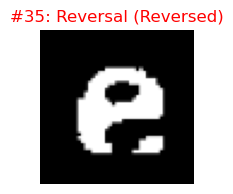

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


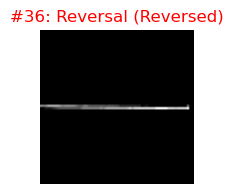

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


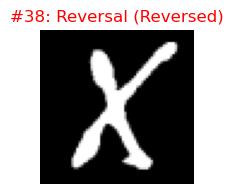

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


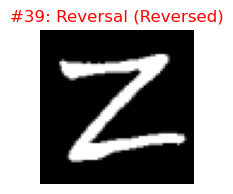

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


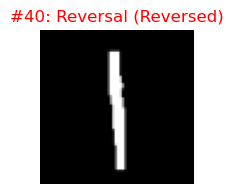

Final OCR output: NormalNormalReversalReversalNormalReversalReversalNormalNormalNormalReversalReversalNormalReversalReversalNormalReversalReversalReversalReversalReversalReversalReversalReversalReversalReversalNormalReversalReversalReversalReversalReversalReversalReversalReversalReversalNormalReversalReversalReversal


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# ─────────────── CONFIG ───────────────
MODEL_PATH = "reversal_detector.h5"
# Map your class-indices to actual characters:
LABEL_MAP  = {0: "Normal", 1: "Reversal", 2: "Normal"}  
# <-- must match the model's input_shape=(64,64,1)
INPUT_SIZE = (64, 64)
# Skip any contour whose bounding-box area is below this:
MIN_AREA   = 300  


# ────────── PREPROCESSING FUNC ──────────
def preprocess_char(img, output_size=INPUT_SIZE, pad=10):
    """
    1) Binarize (invert to white-on-black)
    2) Crop to largest contour
    3) Square-pad around it
    4) Center the mass
    5) Resize to output_size
    6) Normalize to [0,1]
    """
    # 1) Binarize
    _, thresh = cv2.threshold(
        img, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )

    # 2) Find the largest contour only
    cnts, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    if not cnts:
        # blank if no ink
        blank = np.zeros(output_size, dtype=np.uint8)
        return blank[..., np.newaxis] / 255.0

    c = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]

    # 3) Pad to square
    M = max(w,h) + pad*2
    square = np.zeros((M, M), dtype=np.uint8)
    xo, yo = (M-w)//2, (M-h)//2
    square[yo:yo+h, xo:xo+w] = roi

    # 4) Center by centroid
    m = cv2.moments(square)
    if m["m00"] > 0:
        cx = int(m["m10"]/m["m00"])
        cy = int(m["m01"]/m["m00"])
        tx, ty = M//2 - cx, M//2 - cy
        T = np.float32([[1,0,tx],[0,1,ty]])
        square = cv2.warpAffine(square, T, (M,M), borderValue=0)

    # 5) Resize & 6) Normalize
    out = cv2.resize(square, output_size, interpolation=cv2.INTER_AREA)
    out = out.astype(np.float32) / 255.0
    return out[..., np.newaxis]   # shape = (H, W, 1)


# ─────────── CHAR SEGMENTATION ───────────
def segment_char_images(gray, min_area=MIN_AREA):
    """
    1) Clean small noise with opening
    2) Threshold to binary
    3) Find all contours
    4) Discard tiny ones, sort left→right, and crop each char
    """
    # 1) Remove tiny specks
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    clean = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)

    # 2) Binarize
    _, thresh = cv2.threshold(
        clean, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )

    # 3) Contours
    cnts, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )

    # 4) Keep only big enough
    boxes = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if w*h < min_area:
            continue
        boxes.append((x,y,w,h))

    # sort left→right
    boxes = sorted(boxes, key=lambda b: b[0])

    # crop from original gray
    chars = [gray[y:y+h, x:x+w] for (x,y,w,h) in boxes]
    return chars


# ─────────────── MAIN PREDICT ───────────────
def predict_image(img_path):
    # 1) Load model
    if not os.path.isfile(MODEL_PATH):
        raise FileNotFoundError(f"Cannot find model at {MODEL_PATH}")
    model = load_model(MODEL_PATH)
    print(f"Loaded model from {MODEL_PATH}")

    # 2) Read input
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise FileNotFoundError(f"Cannot read image at {img_path}")
    print(f"Image shape: {gray.shape}")

    # 3) Segment
    chars = segment_char_images(gray)
    print(f"Detected {len(chars)} character candidates")

    if not chars:
        print("No characters found. Check thresholding or image quality.")
        return ""

    # 4) Predict & display
    pred = ""
    for i, ch_img in enumerate(chars, 1):
        inp = preprocess_char(ch_img)                      # (64×64×1)
        logits = model.predict(inp[np.newaxis, ...])       # (1, num_classes)
        cls    = np.argmax(logits, axis=1)[0]
        char   = LABEL_MAP.get(cls, "?")
        pred  += char

    # only visualize if the predicted class is 1 ("Reversed")
        if cls == 1:
            plt.figure(figsize=(2,2))
            plt.imshow(inp.squeeze(), cmap="gray")
            plt.title(f"#{i}: {char} (Reversed)", color="red")
            plt.axis("off")
            plt.show()

    print("Final OCR output:", pred)
    return pred



# ─────────────── USAGE ───────────────
if __name__ == "__main__":
    img_file = r"D:\STUDY\Sumit\lectures sumit\college\Major Project\test.jpeg"
    predict_image(img_file)


Detected 40 candidates
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


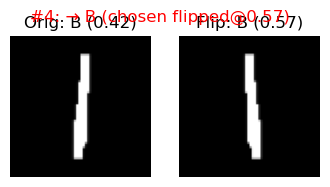

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


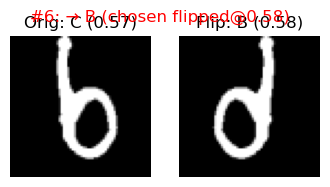

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


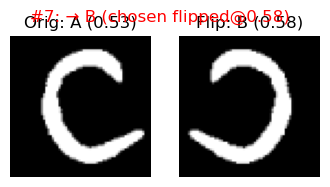

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


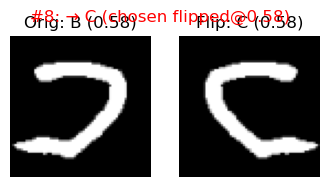

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


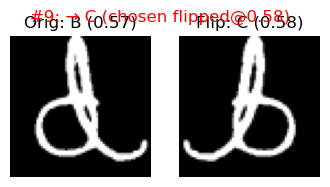

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


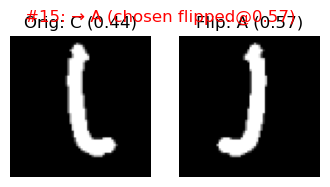

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


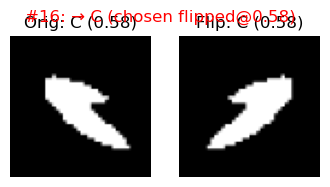

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


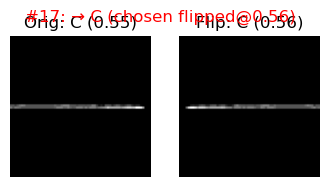

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


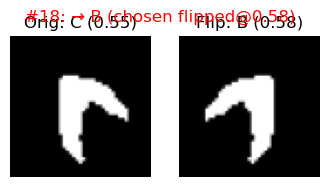

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


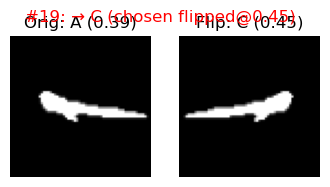

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


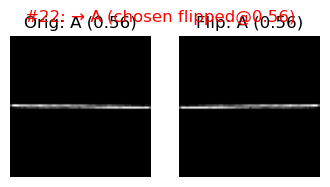

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


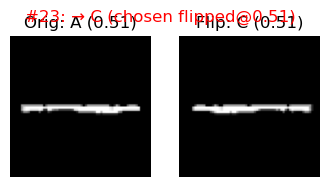

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


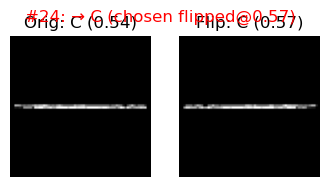

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


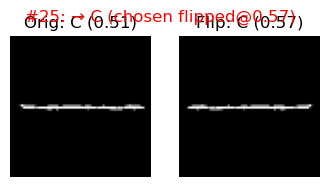

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


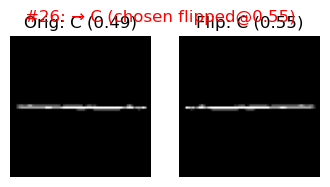

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


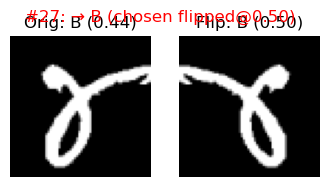

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


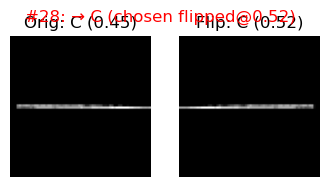

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


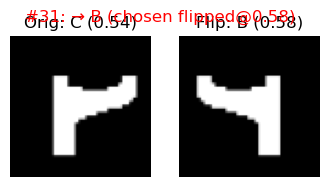

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


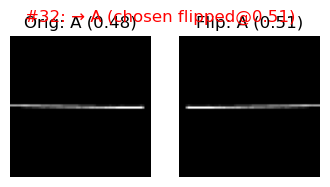

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


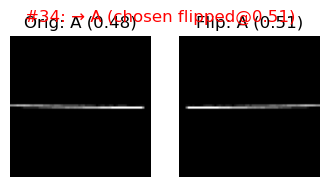

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


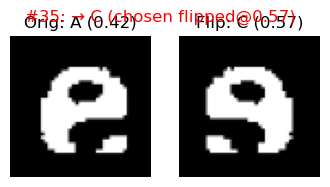

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


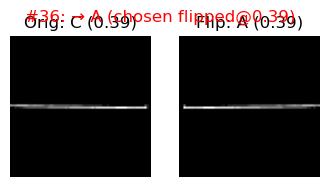

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


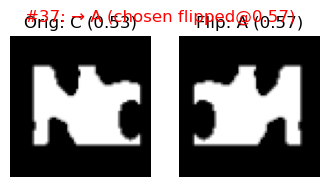

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


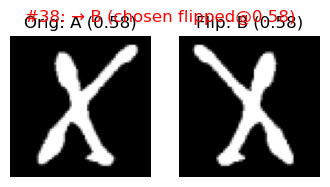

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


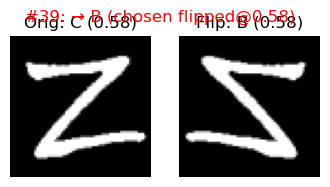

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Final OCR output: CACBCBBCCCBCBCACCBCAAACCCCBCBABACACAABBC


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# ─────────────── CONFIG ───────────────
MODEL_PATH = "char_recognition_model.h5"
LABEL_MAP  = {0: "A", 1: "B", 2: "C"}    # map your class indices → chars
INPUT_SIZE = (64, 64)                   # must match model.input_shape[1:3]
MIN_AREA   = 300                        # filter out tiny specks

# ────────── PREPROCESSING FUNC ──────────
def preprocess_char(img, output_size=INPUT_SIZE, pad=8):
    # 1) binarize (white-on-black)
    _, thresh = cv2.threshold(
        img, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )
    # 2) extract largest contour
    cnts, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    if not cnts:
        blank = np.zeros(output_size, dtype=np.uint8)
        return blank[..., np.newaxis] / 255.0

    c = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]

    # 3) pad to square
    M = max(w, h) + pad*2
    square = np.zeros((M, M), dtype=np.uint8)
    xo, yo = (M-w)//2, (M-h)//2
    square[yo:yo+h, xo:xo+w] = roi

    # 4) center mass
    m = cv2.moments(square)
    if m["m00"] > 0:
        cx = int(m["m10"]/m["m00"])
        cy = int(m["m01"]/m["m00"])
        tx, ty = M//2 - cx, M//2 - cy
        T = np.float32([[1,0,tx],[0,1,ty]])
        square = cv2.warpAffine(square, T, (M, M), borderValue=0)

    # 5) resize + 6) normalize
    out = cv2.resize(square, output_size, interpolation=cv2.INTER_AREA)
    return (out.astype(np.float32) / 255.0)[..., np.newaxis]

# ─────────── SEGMENTATION ───────────
def segment_char_images(gray, min_area=MIN_AREA):
    # remove tiny noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    clean = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
    # binarize
    _, thresh = cv2.threshold(
        clean, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )
    cnts, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    boxes = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if w*h < min_area:
            continue
        boxes.append((x,y,w,h))
    boxes = sorted(boxes, key=lambda b: b[0])
    return [ gray[y:y+h, x:x+w] for (x,y,w,h) in boxes ]

# ────────── FLIP-SCORING FUNC ──────────
def predict_with_flip(model, img_patch):
    """
    Returns:
      (cls_o, prob_o), (cls_f, prob_f)
    for original and horizontally-flipped patch.
    """
    # original
    inp_o = preprocess_char(img_patch)
    logits_o = model.predict(inp_o[None,...])[0]
    probs_o = tf.nn.softmax(logits_o).numpy()
    cls_o, prob_o = int(probs_o.argmax()), float(probs_o.max())

    # flipped
    flipped = np.fliplr(img_patch)
    inp_f = preprocess_char(flipped)
    logits_f = model.predict(inp_f[None,...])[0]
    probs_f = tf.nn.softmax(logits_f).numpy()
    cls_f, prob_f = int(probs_f.argmax()), float(probs_f.max())

    return (cls_o, prob_o), (cls_f, prob_f)

# ─────────── MAIN PREDICT ───────────
def predict_image(img_path):
    if not os.path.isfile(MODEL_PATH):
        raise FileNotFoundError(f"Model not found: {MODEL_PATH}")
    model = load_model(MODEL_PATH)

    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise FileNotFoundError(f"Image not found: {img_path}")

    chars = segment_char_images(gray)
    print(f"Detected {len(chars)} candidates")

    final = []
    for i, ch in enumerate(chars, 1):
        (cls_o, p_o), (cls_f, p_f) = predict_with_flip(model, ch)
        # choose orientation with higher confidence
        if p_f > p_o:
            cls, conf, ori = cls_f, p_f, "flipped"
        else:
            cls, conf, ori = cls_o, p_o, "normal"
        char = LABEL_MAP.get(cls, "?")
        final.append(char)

        # visualize only if flipped won
        if ori == "flipped":
            plt.figure(figsize=(4,2))
            plt.subplot(1,2,1)
            plt.imshow(preprocess_char(ch).squeeze(), cmap="gray")
            plt.title(f"Orig: {LABEL_MAP[cls_o]} ({p_o:.2f})")
            plt.axis("off")
            plt.subplot(1,2,2)
            plt.imshow(preprocess_char(np.fliplr(ch)).squeeze(), cmap="gray")
            plt.title(f"Flip: {LABEL_MAP[cls_f]} ({p_f:.2f})")
            plt.axis("off")
            plt.suptitle(f"#{i}: → {char} (chosen {ori}@{conf:.2f})", color="red")
            plt.show()

    result = "".join(final)
    print("Final OCR output:", result)
    return result

# ───────────── USAGE ─────────────
if __name__ == "__main__":
    img_file = r"D:\STUDY\Sumit\lectures sumit\college\Major Project\test.jpeg"
    predict_image(img_file)
